# Proof of Concept for Creating an Updated Plant Hardiness Map

Using extreme minimum temperature data from 2019.

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

I use a different notebook to download the data and filter it down to what is needed for this prototype. [see that notebook](grab_data.ipynb)

In [2]:
df = pd.read_csv('gsoy_filtered.csv')
df.head()

Unnamed: 0  DATE  LATITUDE  LONGITUDE  EMNT
0          46  2019  32.94520  -85.94800  -7.8
1          51  2019  33.12720  -88.15500 -11.1
2          15  2019  34.96285  -87.37195  -9.4
3          45  2019  34.77520  -86.95080  -8.3
4          56  2019  31.18200  -87.43900  -4.4

## Throw the stations on a map

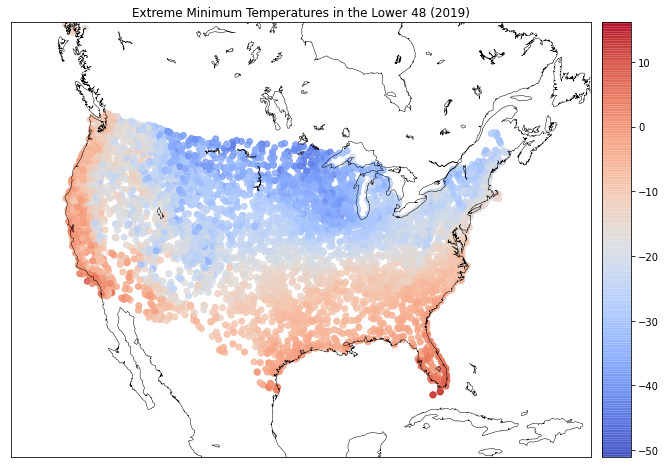

In [3]:
lon = df['LONGITUDE'].to_numpy()
lat = df['LATITUDE'].to_numpy()
emnt = df['EMNT'].to_numpy()

fig = plt.figure(num=None, figsize=(12, 8)) 

m = Basemap(
    width=6000000,
    height=4500000,
    resolution='l',
    projection='aea',
    lat_1=35.,
    lat_2=45,
    lon_0=-95,
    lat_0=40
    )

x, y = m(lon, lat)
m.scatter(x, y, c=emnt, cmap='coolwarm', alpha=0.8)
m.drawcoastlines(linewidth=0.5)
plt.title('Extreme Minimum Temperatures in the Lower 48 (2019)')
m.colorbar()

## Creating a filled contour plot

First we have to finagle the temperature data into a grid:


In [4]:

grid_res = 800

x = np.linspace(lon.min(), lon.max(), grid_res)
y = np.linspace(lat.min(), lat.max(), grid_res)
xx, yy = np.meshgrid(x, y)

emnt2 = griddata(
    (lon, lat),
    emnt,
    (xx[None,:], yy[:,None]),
    method='linear'
    )

Ready to draw the contour plot:

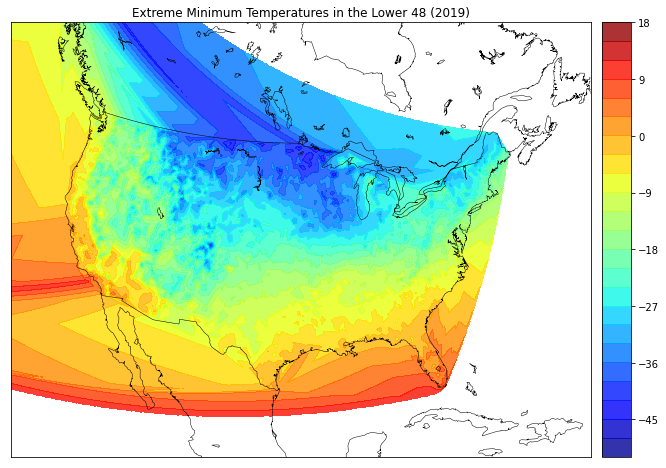

In [5]:
fig = plt.figure(num=None, figsize=(12, 8)) 

m = Basemap(
    width=6000000,
    height=4500000,
    resolution='l',
    projection='aea',
    lat_1=35.,
    lat_2=45,
    lon_0=-95,
    lat_0=40
    )
xx, yy = m(xx, yy)
m.contourf(xx, yy, emnt2[:,0,:], range(-51, 21, 3), cmap='jet', alpha=0.8)

m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
plt.title('Extreme Minimum Temperatures in the Lower 48 (2019)')
m.colorbar()

## Some notes

### Coloring outside the lines

This is caused by interpolating between the lower 48, Alaska, and Hawaii.

### Zones and Colors

I created some quick and dirty temperature zones from -51 to 21 with steps of 3 degrees, this isn't a perfect match for real zones and will have to be cleaned up.

A custom color map could also be created to match the familiar USDA map.

### Deprecated map library

Basemap will cease to be maintained so a different library should be used. perhaps [cartopy](https://scitools.org.uk/cartopy/docs/latest/)